Amanda Rodgers
July 18, 2024
Anti-money laundering Project

In [ ]:
# Dataset: https://www.kaggle.com/datasets/anshankul/ibm-amlsim-example-dataset?select=transactions.csv
# Tutorial: https://medium.com/@jasonclwu/network-analysis-for-anti-money-laundering-with-python-ad981792a947
# Github: https://github.com/jasonclwu/202209_AML_Network_Analysis/blob/main/AML_Network_Analysis.ipynb

In [ ]:
# Import libraries
import pandas as pd
import networkx as nx
from pyvis.network import Network as net
# from pyvis import Network as net
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
# Create df with dataset
txn_small = pd.read_csv('transactions.csv', usecols=['SENDER_ACCOUNT_ID','RECEIVER_ACCOUNT_ID','TX_AMOUNT'], dtype='object')
txn_small['TX_AMOUNT'] = txn_small['TX_AMOUNT'].astype(float)
txn_small

<h2>Sum transaction amounts for each node pair</h2>

In [ ]:
# Form nodes and edges by grouping by account numbers with a count of transactions and sum of amounts
# Money came from source account and target is the account it went to
# Create new columns agg_txn_count(number of transactions) and agg_txn_amt (sum of all transactions)
edge_small = txn_small.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':['count','sum']})
edge_small.columns = ['source','target','agg_txn_count','agg_txn_amt']
edge_small

In [33]:
# Make df smaller for faster processing
first_5000_rows_df = edge_small.head(5000)
first_5000_rows_df

,source,target,agg_txn_count,agg_txn_amt
0,1,884,24,"4,219"
1,10,8317,21,"2,003"
2,10,8520,21,"2,003"
3,100,3472,18,978
4,100,9954,18,978
...,...,...,...,...
4995,2121,8634,22,467
4996,2121,9388,22,467
4997,2121,9448,22,467
4998,2121,9968,22,467


<h2>Construct Network with NetworkX</h2>

In [ ]:
# Create graph network with networkX
G = nx.from_pandas_edgelist(first_5000_rows_df, source='source', target='target')

In [ ]:
# Access node and edge information from G, variable that stores graph
# Show first five nodes of graph, pattern is source, target, source, target, source, target
list(G.nodes)[0:5]

In [ ]:
# Show the first 5 edge of G
# Shows ('target', 'source')
list(G.edges)[0:5]

In [ ]:
# Show the first 5 edge of G with all attributes with data=True, there are no attributes in this case
# [('source', 'target' {attributes})]
list(G.edges(data=True))[0:5]

In [ ]:
# Show the first 5 nodes of G with all attributes with data=True, there are no attributes in this case
list(G.nodes(data=True))[0:5]

<h2>Various network layouts</h2>

In [ ]:
# Networkx Default Layout
# Create a network graph using networkx
plt.figure(figsize=(8,6))
nx.draw(G)
plt.show()

In [ ]:
# Debug: Print the graph information
# print(f"Nodes: {G.nodes()}")
# print(f"Edges: {G.edges()}")

In [ ]:
# Create a Pyvis network and visualize the NetworkX graph
# Pyvis Default Layout
# nt = net.Network(width='100%', height='100%', directed=True)
# nt.from_nx(G)
# nt.show('01_pyvis_default.html')

In [ ]:
# Debug: Check the Pyvis network
# print(f"Pyvis Nodes: {nt.nodes}")
# print(f"Pyvis Edges: {nt.edges}")

<h3>? can't get plot to render below?</h3>

In [ ]:
# Is not working, check to see if file was created and if browser and cloud are compatible
# see if versions of pyvis and networkX are compatible
# ERROR AttributeError: module 'pyvis.network' has no attribute 'network'(pyvis object net.network is not
# being created)

nt = net.Network(width='100%', height='100%', directed=True)
nt.from_nx(G)
nt.show('01_pyvis_default.html')

In [ ]:
# Debug
# Ensure that the Pyvis network object nt is correctly initialized 
# and that the from_nx method is successfully converting the NetworkX graph.
from pyvis.network import Network

nt = Network(width='100%', height='100%', directed=True)
nt.from_nx(G)

# Check the Pyvis network
print(nt.nodes)
print(nt.edges)

In [ ]:
pip install --upgrade networkx

In [ ]:
pip install --upgrade pyvis

In [ ]:
# Debug
# Create a Pyvis network and visualize the NetworkX graph
nt = Network(width='100%', height='100%', directed=True)
nt.from_nx(G)

# Debug: Check the Pyvis network
print(f"Pyvis Nodes: {nt.nodes}")
print(f"Pyvis Edges: {nt.edges}")

# Show the network
nt.show('1_pyvis_default.html')

<h3>Create function for drawing network graph</h3>

In [ ]:
def show_graph(graph, filename):
    nt = net.Network(width='100%', height='100%', directed=True)
    nt.from_nx(graph)
    nt.show(filename)

<h3>Set Node Attributes</h3>

<h3>Set the node size according to the degree (number of connections) of node</h3>

In [23]:
# List source, 
# ?? follow on graph what these mean('source1', has 1 connection), ('targetamt884', 'is connected with source1'), ('source10', 'has 2 connections')
list(G.degree)[0:5]

[('1', 1), ('884', 1), ('10', 2), ('8317', 3), ('8520', 2)]

In [25]:
# Creates a dictionary of key = node id and value = node degree (how many connections that node has)
# Nodes with a bigger degree will appear bigger in the graph
degree_dict_G = dict(G.degree)
nx.set_node_attributes(G, degree_dict_G, 'value')

In [26]:
# List graph dictionary of nodes with attributes size and value being number of connections (same as size but pyvis 
# recognizes it different)
# size = number of connections to that node
# Below shows that the new attribute value has been added
list(G.nodes(data=True))[0:5]

[('1', {'size': 10, 'value': 1}),
 ('884', {'size': 10, 'value': 1}),
 ('10', {'size': 10, 'value': 2}),
 ('8317', {'size': 10, 'value': 3}),
 ('8520', {'size': 10, 'value': 2})]

<h3>Graph won't render, pyvis net.network object never created</h3>

In [28]:
show_graph(G, '02_node_size.html')

NameError: name 'show_graph' is not defined

<h3> ?? graph won't render</h3>

In [29]:
# Show graph to that nodes with higher degrees are larger
# Besides using degree as the centrality measurement, 
# you can also use other measurements under graph theory (link) such as eigenvector, closeness, betweenness etc
# For any above, you have to obtain the measurement for each node in a dictionary form, then pass the dictionary 
# to the node attribute with attribute name of value.
nt.show_graph()

AttributeError: 'Network' object has no attribute 'show_graph'

<h3>Display Node Information on Hover</h3>

<h3> graph will not render???</h3>

In [30]:
# Use title attribute to show info of node when you hover over it
# if you want to add more info in addition to account number, pass more information to the title attribute
title_dict_G = {}
for node in list(G.nodes):
    title_dict_G[node] = f'id: {node}'
nx.set_node_attributes(G, title_dict_G, 'title')
show_graph(G, '03_node_title_1.html')

NameError: name 'show_graph' is not defined

<h3>Retrieve neighbors for each node</h3>

In [34]:
# List neighbors of node 2121
list(G.neighbors('2121'))[0:5]

['3674', '6042', '6735', '7028', '8634']

In [35]:
# Create a dictionary of neighbor list for each node
neighbor_dict_G = {}
for node in list(G.nodes):
    neighbor_dict_G[node] = ','.join(G.neighbors(node))

<h3> ? graph won't show, error: NameError: name 'show_graph' is not defined</h3>

In [36]:
# Incorporate the dictionary to the attribute title to display: 
# Display ID, Degree and Neighbors in Graph (Hover on Node)
title_dict_G = {}
for node in list(G.nodes):
    title_dict_G[node] = f'id: {node}\ndegree: {degree_dict_G[node]}\nneighbor: {neighbor_dict_G[node]}'
nx.set_node_attributes(G, title_dict_G, 'title')

show_graph(G, '04_node_title_2.html')

NameError: name 'show_graph' is not defined

In [ ]:
# NOTE: you can update the node attribute dictionary under G which the attribute name (dictionary key) 
# needs to match with pyvis’s parameter name (label, title, size, value and etc.)

<h3>Setting Edge Attributes</h3>

In [ ]:
# Set the edge attributes dictionary under G
# you can adjust the edge width according to the aggregated transaction amount between accounts, 
# and show detailed edge information on hover such as payer, payee, aggregated transaction amount 
# and aggregated transaction count

In [38]:
# Obtain the edge attribute dictionary by updating the source dataframe edge_small
edge_small['value'] = edge_small['agg_txn_amt']
edge_small['title'] = edge_small.apply(lambda df: f'from: {df.source}\nto: {df.target}\nagg_count: {df.agg_txn_count:,.0f}\nagg_amount: {df.agg_txn_amt:,.0f}', axis=1)
edge_small.head()

,source,target,agg_txn_count,agg_txn_amt,value,title
0,1,884,24,"4,219","4,219",from: 1\nto: 884\nagg_count: 24\nagg_amount: 4...
1,10,8317,21,"2,003","2,003",from: 10\nto: 8317\nagg_count: 21\nagg_amount:...
2,10,8520,21,"2,003","2,003",from: 10\nto: 8520\nagg_count: 21\nagg_amount:...
3,100,3472,18,978,978,from: 100\nto: 3472\nagg_count: 18\nagg_amount...
4,100,9954,18,978,978,from: 100\nto: 9954\nagg_count: 18\nagg_amount...


In [ ]:
# Value controls the size (width) of edge and title controls the information to be shown on hover

<h3>Setting edge size and information to display on hover</h3>

<h3> ?? graph won't render</h3>

In [39]:
# create an edge attribute dictionary for value and title and pass it to G so pyvis will update the edge 
# layout accordingly
# graph is now able to show more information with differentiated edge size and hover information
edge_dict_G = {}
for index, row in edge_small.iterrows():
    edge_dict_G[tuple([row['source'], row['target']])] = {'value':row['value'], 'title':row['title']}
nx.set_edge_attributes(G, edge_dict_G)

show_graph(G, '05_edge_title_and_value.html')

NameError: name 'show_graph' is not defined

<h3>Community Detection with Large Dataset</h3>

In [ ]:
# explore the network structure of a larger dataset

In [40]:
txn_full = pd.read_csv('transactions.csv', usecols=['SENDER_ACCOUNT_ID','RECEIVER_ACCOUNT_ID','TX_AMOUNT'], dtype='object')
txn_full['TX_AMOUNT'] = txn_full['TX_AMOUNT'].astype(float)

edge_large = txn_full.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':['count','sum']}).sample(2000, random_state=721)
edge_large.columns = ['source','target','agg_edge_large_count','agg_edge_large_amt']
edge_large['value'] = edge_large['agg_edge_large_amt']
edge_large['title'] = edge_large.apply(lambda df: f'from: {df.source}\nto: {df.target}\nagg_count: {df.agg_edge_large_count:,.0f}\nagg_amount: {df.agg_edge_large_amt:,.0f}', axis=1)

edge_large

,source,target,agg_edge_large_count,agg_edge_large_amt,value,title
63958,9703,6059,20,"2,506","2,506",from: 9703\nto: 6059\nagg_count: 20\nagg_amoun...
38025,7369,9795,2,"1,338,379","1,338,379",from: 7369\nto: 9795\nagg_count: 2\nagg_amount...
64700,9722,9962,20,"2,973","2,973",from: 9722\nto: 9962\nagg_count: 20\nagg_amoun...
41653,7881,9751,20,"5,923","5,923",from: 7881\nto: 9751\nagg_count: 20\nagg_amoun...
23451,5376,4205,2,"1,755,996","1,755,996",from: 5376\nto: 4205\nagg_count: 2\nagg_amount...
...,...,...,...,...,...,...
61987,9647,9206,20,"3,453","3,453",from: 9647\nto: 9206\nagg_count: 20\nagg_amoun...
5068,2132,8921,23,701,701,from: 2132\nto: 8921\nagg_count: 23\nagg_amoun...
21665,5185,5233,21,448,448,from: 5185\nto: 5233\nagg_count: 21\nagg_amoun...
68701,998,275,15,"5,846","5,846",from: 998\nto: 275\nagg_count: 15\nagg_amount:...


In [41]:
# Import the dataframe to networkx
# #Note that we add the argument "edge_attr" in "from_pandas_edgelist" so that we don't have to add edge attribute seperately.
H = nx.from_pandas_edgelist(edge_large, source='source', target='target', edge_attr=['title','value'])


In [42]:
# Verify if the edge attributes are successfully imported to H
list(H.edges(data=True))[0:2]

[('9703',
  '6059',
  {'title': 'from: 9703\nto: 6059\nagg_count: 20\nagg_amount: 2,506',
   'value': 2505.8}),
 ('6059',
  '7182',
  {'title': 'from: 6059\nto: 7182\nagg_count: 22\nagg_amount: 228',
   'value': 228.14})]

<h3>? graph will not render Still getting this error:AttributeError: type object 'Network' has no attribute 'Network'</h3>

In [43]:
# Generate the graph with pyvis 
# Add a line nt.toggle_physics(False) beforehand otherwise the graph will take a very long time to load
nt = net.Network(width='100%', height='100%', directed=False)
nt.toggle_physics(False)
nt.from_nx(H)
nt.show('06_H_full.html')

AttributeError: type object 'Network' has no attribute 'Network'

In [ ]:
# The graph has too much info to interpret so we need to separate it into groups with community detection
# from fund flow analysis perspective, a reasonable approach is to group linked nodes in a single group and 
# those non-linked nodes into another group so that each group are unconnected, which can be assessed by the 
# function nx.connected_components(H)

<h3>Identify mutually exclusive communities</h3>

In [44]:
# Separate nodes that are connected and not connect
list(nx.connected_components(H))[0:5]

[{'4333', '6059', '7182', '9703'},
 {'4297', '5573', '7266', '7369', '9795'},
 {'5788', '8914', '9722', '9962'},
 {'6333', '7881', '7911', '9751', '9797'},
 {'4205', '474', '5366', '5376', '8708', '9789'}]

In [45]:
# Check how many unconnected groups there are in H: 
len(list(nx.connected_components(H)))

1041

In [48]:
# Assign the group number (from 1 to 1,041) to each node in the form of dictionary 
# In other words: Assign a community to each group
group_dict_H = {}

for group, nodes in enumerate(sorted(list(nx.connected_components(H)), key=len, reverse=True), start=1):
    for node in nodes:
        group_dict_H[node] = group

In [49]:
# NOTE: ## Other algorithms: https://networkx.org/documentation/stable/reference/algorithms/community.html

In [50]:
# Get a summary of group size 
groups = pd.DataFrame({'source':group_dict_H.keys(), 'group':group_dict_H.values()}).sort_values(by=['group','source'])
groups

,source,group
62,1087,1
36,1609,1
49,1890,1
32,1905,1
20,2369,1
...,...,...
3035,5233,1039
3036,275,1040
3037,998,1040
3038,7693,1041


<h3>Display ID, group, degree and neighbors in graph (hover on node)</h3>

In [52]:
# Set the node attribute value and title for each node under H, add one more element which is the group attribute
# Group attribute will assign different node and edge colors for each group
nx.set_node_attributes(H, group_dict_H, 'group')

degree_dict_H = dict(H.degree)
nx.set_node_attributes(H, degree_dict_H, 'value')

neighbor_dict_H = {}
for node in list(H.nodes):
    neighbor_dict_H[node] = ','.join(H.neighbors(node))

title_dict_H = {}
for node in list(H.nodes):
    title_dict_H[node] = f'id: {node}\ngroup: {group_dict_H[node]}\ndegree: {degree_dict_H[node]}\nneighbor: {neighbor_dict_H[node]}'
nx.set_node_attributes(H, title_dict_H, 'title')

In [ ]:
# With group attribute we can use it to filter the nodes for graph generation with H.subgraph(). 

<h3>Create subgraph to display selected groups only</h3>

In [54]:
# Generate the network graph for group 1 to 4:target_groups = [1,2,3,4]
# Display group 1-4 with pyvis default layout
target_groups = [1,2,3,4]
target_nodes = [node for node, group in group_dict_H.items() if group in target_groups]
H_sub = H.subgraph(target_nodes)

<h3> ?? graph wil not render</h3>

In [55]:
# ERROR: NameError: name 'show_graph' is not defined
# should have a network graph with diff colors
show_graph(H_sub, '7_communities_pyvis_default.html')

NameError: name 'show_graph' is not defined

<h3>?? graph won't render Display group 1-4 with networkx kamada kawai layout</h3>

In [57]:
# ??? get ERROR nt = net.Network(width='100%', height='100%', directed=True)
nt.from_nx(H_sub)

pos = nx.kamada_kawai_layout(H_sub, scale=1000)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

nt.show('08_communities_kamada_kawai.html')
nt = net.Network(width='100%', height='100%', directed=True)
nt.from_nx(H_sub)

pos = nx.kamada_kawai_layout(H_sub, scale=1000)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

nt.show('08_communities_kamada_kawai.html')

KeyError: '1'

<h3> ?? graph won't render</h3>
<h3>Display group 1-4 with networkx spring layout</h3>

In [58]:
nt = net.Network(width='100%', height='100%', directed=True)
nt.from_nx(H_sub)

pos = nx.spring_layout(H_sub, scale=1000, seed=721, k=0.01)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

nt.show('09_communities_spring.html')

AttributeError: type object 'Network' has no attribute 'Network'

<h3>Identify end-to-end fund flow of any given node</h3>

<h3> ?? graph won't render</h3>

In [60]:
# Extend the code further to show the network graph of any given node and its connected nodes. 
# Find the end-to-end fund flow of account number 9989
# Most powerful use case in AML investigation which allow you to identify all related accounts 
# from an end-to-end perspective, staring with any given node
# Highlight the input node 9989 by changing its shape, image and color attribute
target_node = '9989'
target_groups = [dict(H.nodes(data=True))[target_node]['group']]
target_nodes = [node for node, group in group_dict_H.items() if group in target_groups]

H_sub = H.subgraph(target_nodes)

nt = net.Network(width='100%', height='100%', directed=True)
nt.from_nx(H_sub)

pos = nx.spring_layout(H_sub, scale=1000, seed=721, k=0.01)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

[node for node in nt.nodes if node['id']==target_node][0]['shape'] = 'image'
[node for node in nt.nodes if node['id']==target_node][0]['image'] = 'https://openmoji.org/data/color/svg/1F608.svg'
[node for node in nt.nodes if node['id']==target_node][0]['color'] = '#ff4f4f'

nt.show('10_show_group_with_given_node.html')

AttributeError: type object 'Network' has no attribute 'Network'

In [61]:
# Determine the manageable timeframe coverage (or sample size in our case), 
# check the maximum group size under different sample size
# Replace random sampling with different range of timeframe (e.g. week, month, quarter, year etc.) 
# For example, there are 11 nodes in the biggest group if we have sampled 1,000 edges, 
# 28 nodes in the biggest group for a 1,500 edge sample, so forth and so on.

edge_full = txn_full.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':'count'}).drop(columns=['TX_AMOUNT']).rename(columns={'SENDER_ACCOUNT_ID':'source','RECEIVER_ACCOUNT_ID':'target'})

max_dict = {}
for i in range(1000, len(edge_full)+1, 500):
    G = nx.from_pandas_edgelist(edge_full.sample(i, random_state=721), source='source', target='target')
    max_dict[i] = max(sorted([len(x) for x in list(nx.connected_components(G))]))

max_group_size_per_sample = pd.DataFrame({'sample_size':max_dict.keys(), 'max_group_size':max_dict.values()})
max_group_size_per_sample

,sample_size,max_group_size
0,1000,11
1,1500,28
2,2000,64
3,2500,121
4,3000,406
...,...,...
131,66500,9995
132,67000,9997
133,67500,9998
134,68000,9999


<h3>?? has error Export node and edge information for further analysis</h3>

In [62]:
H_sub_nodes = pd.DataFrame(nt.nodes)[['id','group','value','title']].rename(columns={'id':'source','value':'degree','title':'neighbor'}).sort_values(by='source')
H_sub_nodes['neighbor'] = H_sub_nodes['neighbor'].apply(lambda x:x.split('neighbor: ')[-1])
H_sub_nodes.head(5)

AttributeError: 'float' object has no attribute 'split'

In [63]:
H_sub_edges = edge_large[(edge_large['source'].isin(target_nodes)) | (edge_large['target'].isin(target_nodes))].drop(columns=['value','title']).sort_values(by=['source','target'])
H_sub_edges.head()

,source,target,agg_edge_large_count,agg_edge_large_amt
6847,2394,9158,3,"22,831,488"
20399,5049,9989,24,371
31225,6642,2394,20,"3,114"
32421,6743,9912,20,"2,012"
34844,7119,9587,24,363


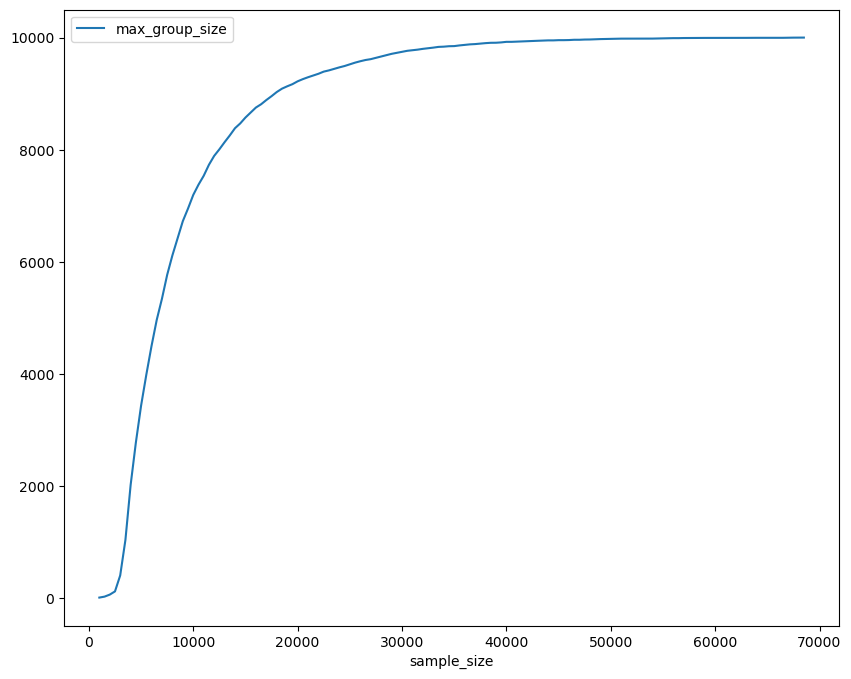

In [64]:
max_group_size_per_sample.plot(x='sample_size', y='max_group_size', figsize=(10,8))
plt.show()